In [1]:
from keras.utils import *
from keras import models
from keras import layers
from keras import preprocessing
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.embeddings import Embedding
from keras.utils.vis_utils import plot_model
from tensorflow.keras.preprocessing.sequence import pad_sequences
from collections import Counter

In [2]:
import torch
import numpy as np
from keras.preprocessing.text import Tokenizer
from gensim.models.fasttext import FastText

In [21]:
import tensorflow as tf
from tensorflow import keras
from collections import Counter

In [3]:
!wget https://www.dropbox.com/s/r6u59ljhhjdg6j0/negative.csv
!wget https://www.dropbox.com/s/fnpq3z4bcnoktiv/positive.csv 

--2021-02-07 19:08:41--  https://www.dropbox.com/s/r6u59ljhhjdg6j0/negative.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.82.18, 2620:100:6032:18::a27d:5212
Connecting to www.dropbox.com (www.dropbox.com)|162.125.82.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/r6u59ljhhjdg6j0/negative.csv [following]
--2021-02-07 19:08:41--  https://www.dropbox.com/s/raw/r6u59ljhhjdg6j0/negative.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc5a5242e4ac6609c25eab69276f.dl.dropboxusercontent.com/cd/0/inline/BIhVh9tKxFnyu1SqB4XIC82x8dO6VZ6v_mYMImV6uSrNN207Hih99lUCzOsXIQdPnqM4902tydB0FaleQlQ-hpt4bN0UjopfqT49J7lgAAC5UA/file# [following]
--2021-02-07 19:08:42--  https://uc5a5242e4ac6609c25eab69276f.dl.dropboxusercontent.com/cd/0/inline/BIhVh9tKxFnyu1SqB4XIC82x8dO6VZ6v_mYMImV6uSrNN207Hih99lUCzOsXIQdPnqM4902tydB0FaleQlQ-hpt4bN0UjopfqT49J7lgAAC5UA/file
Resolving uc5

In [4]:
import pandas as pd
import gensim

negative = pd.read_csv('negative.csv', delimiter=';', names=["id",
                                                             "tdate",
                                                             "tname",
                                                             "ttext",
                                                             "ttype",
                                                             "trep",
                                                             "trtw",
                                                             "tfav",
                                                             "tstcount",
                                                             "tfol",
                                                             "tfrien",
                                                             "listcount"])

positive = pd.read_csv('positive.csv', delimiter=';', names=["id",
                                                             "tdate",
                                                             "tname",
                                                             "ttext",
                                                             "ttype",
                                                             "trep",
                                                             "trtw",
                                                             "tfav",
                                                             "tstcount",
                                                             "tfol",
                                                             "tfrien",
                                                             "listcount"])

In [5]:
!wget -c http://vectors.nlpl.eu/repository/20/180.zip
!unzip 180.zip

--2021-02-07 19:08:49--  http://vectors.nlpl.eu/repository/20/180.zip
Resolving vectors.nlpl.eu (vectors.nlpl.eu)... 129.240.189.181
Connecting to vectors.nlpl.eu (vectors.nlpl.eu)|129.240.189.181|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 484452317 (462M) [application/zip]
Saving to: ‘180.zip’

180.zip             100%[===================>] 462.01M  9.96MB/s    in 48s     

2021-02-07 19:09:39 (9.53 MB/s) - ‘180.zip’ saved [484452317/484452317]

Archive:  180.zip
  inflating: meta.json               
  inflating: model.bin               
  inflating: model.txt               
  inflating: README                  


In [6]:
model = gensim.models.KeyedVectors.load_word2vec_format("model.bin", binary=True)
#model = gensim.models.KeyedVectors.load_word2vec_format("araneum_none_fasttextcbow_300_5_2018.model", binary=True)
model.init_sims(replace=True)
model.save_word2vec_format("model.txt")

In [7]:
pos_neg = pd.concat([positive, negative])

In [8]:
pos_neg

,id,tdate,tname,ttext,ttype,trep,trtw,tfav,tstcount,tfol,tfrien,listcount
0,408906692374446080,1386325927,pleease_shut_up,"@first_timee хоть я и школота, но поверь, у на...",1,0,0,0,7569,62,61,0
1,408906692693221377,1386325927,alinakirpicheva,"Да, все-таки он немного похож на него. Но мой ...",1,0,0,0,11825,59,31,2
2,408906695083954177,1386325927,EvgeshaRe,RT @KatiaCheh: Ну ты идиотка) я испугалась за ...,1,0,1,0,1273,26,27,0
3,408906695356973056,1386325927,ikonnikova_21,"RT @digger2912: ""Кто то в углу сидит и погибае...",1,0,1,0,1549,19,17,0
4,408906761416867842,1386325943,JumpyAlex,@irina_dyshkant Вот что значит страшилка :D\nН...,1,0,0,0,597,16,23,1
...,...,...,...,...,...,...,...,...,...,...,...,...
111918,425138243257253888,1390195830,Yanch_96,Но не каждый хочет что то исправлять:( http://...,-1,0,0,0,1138,32,46,0
111919,425138339503943682,1390195853,tkit_on,скучаю так :-( только @taaannyaaa вправляет мо...,-1,0,0,0,4822,38,32,0
111920,425138437684215808,1390195876,ckooker1,"Вот и в школу, в говно это идти уже надо(",-1,0,0,1,165,13,16,0
111921,425138490452344832,1390195889,LisaBeroud,"RT @_Them__: @LisaBeroud Тауриэль, не грусти :...",-1,0,1,0,2516,187,265,0


In [9]:
numeric = []
for pn in pos_neg['ttype']:
  if pn == 1:
    numeric.append(1.0)
  else:
    numeric.append(0.0)



In [10]:
pos_neg['Type'] = numeric

In [11]:
vocab_size = 50
encoded_docs = [preprocessing.text.one_hot(d, vocab_size) for d in pos_neg['ttext']]

In [12]:
print(encoded_docs[:100])

[[45, 9, 44, 16, 17, 25, 29, 1, 28, 27, 47, 8, 27, 33, 41, 11, 35, 40], [16, 36, 16, 21, 46, 26, 12, 20, 29, 38, 46, 36, 17, 35, 33], [43, 40, 46, 49, 16, 16, 31, 37, 3], [43, 35, 32, 47, 49, 40, 17, 17, 32, 37, 20, 43, 12, 43, 11, 41, 2, 10, 45, 17, 42, 48, 11, 38, 37, 27, 29, 27, 13], [44, 23, 42, 27, 27, 41, 33, 29, 28, 17, 36, 29, 28, 3, 6, 5, 27, 19, 12, 27, 47, 33], [46, 35, 32, 32, 5, 16, 11, 18, 32, 49, 35, 33, 27, 29, 27, 14], [43, 41, 28, 33, 33, 46, 22, 7, 8, 12, 14, 28, 16, 24, 37, 32, 26, 21, 7, 40, 36, 17], [43, 24, 28, 3, 22, 27, 32, 32, 29, 11, 32, 11, 27, 33], [6, 16, 20, 13, 6], [36, 28, 36, 22, 36, 32, 38, 10, 27, 29, 27, 48], [14, 41, 17, 1, 43, 49, 30, 16, 42, 30, 2, 38], [43, 35, 45, 47, 16, 33, 27, 12, 32, 11, 27, 33, 4, 17, 31, 17, 21, 14, 37, 11, 10, 2, 27, 28], [46, 23, 27, 42, 28, 49, 42, 24, 24, 16], [44, 16, 47, 49, 49, 49, 17, 40, 49], [42, 44, 23, 32, 35, 26, 47, 17, 22, 3, 5, 15, 5, 45, 14, 43, 44, 29, 40, 19, 35], [40, 42, 13, 2, 49, 49, 11, 26, 48, 41,

In [13]:
pos_neg.corr()

,id,tdate,ttype,trep,trtw,tfav,tstcount,tfol,tfrien,listcount,Type
id,1.000000,1.000000,-0.690379,NaN,-0.008887,0.004286,0.001287,-0.010943,-0.028678,-0.009481,-0.690379
tdate,1.000000,1.000000,-0.690379,NaN,-0.008887,0.004286,0.001287,-0.010943,-0.028678,-0.009481,-0.690379
ttype,-0.690379,-0.690379,1.000000,NaN,0.010030,-0.002441,0.001435,0.011269,0.026601,0.009449,1.000000
trep,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
trtw,-0.008887,-0.008887,0.010030,NaN,1.000000,-0.000982,-0.003964,-0.001049,0.001967,-0.001846,0.010030
tfav,0.004286,0.004286,-0.002441,NaN,-0.000982,1.000000,0.003970,0.000844,0.003491,-0.001368,-0.002441
tstcount,0.001287,0.001287,0.001435,NaN,-0.003964,0.003970,1.000000,0.110290,0.299472,0.171470,0.001435
tfol,-0.010943,-0.010943,0.011269,NaN,-0.001049,0.000844,0.110290,1.000000,0.242947,0.539964,0.011269
tfrien,-0.028678,-0.028678,0.026601,NaN,0.001967,0.003491,0.299472,0.242947,1.000000,0.334034,0.026601
listcount,-0.009481,-0.009481,0.009449,NaN,-0.001846,-0.001368,0.171470,0.539964,0.334034,1.000000,0.009449


In [14]:
len(encoded_docs)

226834

In [15]:
ft = gensim.models.FastText(size=10, window=2, min_count=1, seed=33)

pos_neg_split = [p.lower().split() for p in pos_neg['ttext']]
ft.build_vocab(pos_neg_split)
ft.train(pos_neg_split, total_examples=ft.corpus_count, epochs=10)

In [16]:
tokenizer = preprocessing.text.Tokenizer(lower=True)
tokenizer.fit_on_texts(pos_neg_split)

In [17]:
max_length = 300
padded_docs = preprocessing.sequence.pad_sequences(encoded_docs, maxlen=max_length, padding='post')
print(padded_docs)

[[45  9 44 ...  0  0  0]
 [16 36 16 ...  0  0  0]
 [43 40 46 ...  0  0  0]
 ...
 [42 17 49 ...  0  0  0]
 [43  6 42 ...  0  0  0]
 [12 40 36 ...  0  0  0]]


In [18]:
!pip install pymorphy2

     |████████████████████████████████| 61kB 3.5MB/s 
     |████████████████████████████████| 8.2MB 6.1MB/s 


In [19]:
train_data, test_data, train_labels, test_labels = train_test_split(pos_neg['ttext'], pos_neg['Type'], test_size=0.33, random_state=42, stratify=pos_neg['Type'])

In [23]:
import re
r = re.compile("[а-яА-Я0-9]+")
import pymorphy2
morph = pymorphy2.MorphAnalyzer()
import string

def augment_word2vec(sentences: list, model=model):
    # your code here
    final_list = []
    for sentence in sentences:
      #sentence2 = str.maketrans(dict.fromkeys(string.punctuation))
      #sentence = sentence.translate(sentence2)
      #print(sentence)
      word_list = []
      split_words = [w for w in filter(r.match, sentence.split(' '))]
      for s in split_words:
        p = morph.parse(s)[0]
        ready_tuple = (p.normal_form, p.tag.POS)
        word_list.append(ready_tuple)

      final_list.append(word_list)
    return final_list

augment_word2vec(['Asdmamopamo да да да','Мама мыла раму']) # пример

[[('да', 'PRCL'), ('да', 'PRCL'), ('да', 'PRCL')],
 [('мама', 'NOUN'), ('мыло', 'NOUN'), ('рама', 'NOUN')]]

## Способ с одним входом (через fasttext)

In [26]:
embedding_matrix_ft = np.random.random((len(tokenizer.word_index) + 1, ft.vector_size))

In [28]:
pas = 0
for word,i in tokenizer.word_index.items():
    
    try:
        embedding_matrix_ft[i] = ft.wv[word]
    except:
        pas+=1

In [29]:
inp = keras.Input(shape=(max_length,))
emb = layers.Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=ft.vector_size, trainable=False, weights=[embedding_matrix_ft])(inp)

In [30]:
labels = pos_neg['Type']

In [31]:
x = layers.Bidirectional(layers.LSTM(64, return_sequences=True))(emb)
x = layers.Bidirectional(layers.LSTM(64))(x)
out = Dense(1, activation='softmax')(x)

In [33]:
sent_max_len = 189

In [36]:
model2 = keras.Model(inp, out)

metrics = [keras.metrics.Precision(), keras.metrics.Recall(), keras.metrics.Accuracy()]

model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=metrics)
model2.fit(padded_docs, labels, batch_size=50, epochs=10)

#model.predict(pos_neg_split)

##Способ через один и два входа (без fasttext)

In [24]:
pos_aug = augment_word2vec(pos_neg['ttext'])

In [25]:
sentences, sentence_tags =[], [] 
i = 0
for tagged_sentence in list(pos_aug):
    if tagged_sentence:
      sentence, tags = zip(*tagged_sentence)
    else:
      sentence, tags = ([], ())
    sentences.append(sentence)
    sentence_tags.append(tags)
    i += 1

In [26]:
len(pos_aug)

226834

In [27]:
sentence_tags[0]

('PRCL',
 'NPRO',
 'CONJ',
 None,
 'CONJ',
 None,
 'PREP',
 'NPRO',
 'CONJ',
 'PRCL',
 'ADJF',
 'NOUN',
 'PRTF',
 'NOUN',
 None)

In [28]:
sent_train, sent_test, tag_train, tag_test = train_test_split(sentences, sentence_tags, test_size=0.2, random_state=1)

In [29]:
vocab = Counter()
for sent in sent_train:
    sent = [word.lower() for word in sent]
    vocab.update(sent)

In [30]:
filtered_vocab = {word for word in vocab if vocab[word] > 5}
print(len(filtered_vocab))

18146


In [32]:
word2id = {word:i + 2 for i,word in enumerate(filtered_vocab)}
word2id['pad'] = 0
word2id['unk'] = 1  

id2word = {i:word for word, i in word2id.items()}

In [33]:
len(id2word)

18148

In [34]:
tag2id = {'pad':0, 'unk':1}  
for tags in tag_train:
    for tag in tags:
      try:
        if tag.lower() not in tag2id:
          tag2id[tag.lower()] = len(tag2id)
      except AttributeError:
        continue

id2tag = {i:tag for tag, i in tag2id.items()}

In [35]:
tag2id

{'adjf': 3,
 'adjs': 11,
 'advb': 8,
 'comp': 15,
 'conj': 9,
 'grnd': 18,
 'infn': 13,
 'intj': 17,
 'noun': 7,
 'npro': 6,
 'numr': 12,
 'pad': 0,
 'prcl': 2,
 'pred': 14,
 'prep': 5,
 'prtf': 10,
 'prts': 16,
 'unk': 1,
 'verb': 4}

In [36]:
id2tag

{0: 'pad',
 1: 'unk',
 2: 'prcl',
 3: 'adjf',
 4: 'verb',
 5: 'prep',
 6: 'npro',
 7: 'noun',
 8: 'advb',
 9: 'conj',
 10: 'prtf',
 11: 'adjs',
 12: 'numr',
 13: 'infn',
 14: 'pred',
 15: 'comp',
 16: 'prts',
 17: 'intj',
 18: 'grnd'}

In [37]:
chars = set([letter for word in filtered_vocab for letter in word])
n_chars = len(chars)
print(chars)


{'d', '`', 'l', '0', 'а', 'ө', 'ë', 'э', 'л', '/', 'ю', 'д', '6', 'і', '9', 'r', 'ф', 'п', 'з', 'ж', ':', 'ц', 'и', 'щ', '(', 't', '%', 'e', 'в', 'ч', 'г', 's', '1', 'м', '2', '?', 'h', 'ъ', '=', 'я', 'с', 'ы', 'к', 'p', 'b', 'қ', '*', 'c', '°', 'х', '—', 'й', 'н', 'б', 'u', '\xa0', 'ң', 'v', ',', '^', '!', '&', 'o', '5', 'о', '_', 'е', '«', '7', '»', 'g', 'у', 'р', ';', 'q', '8', 'ё', '…', 'a', '3', '.', 'т', '-', 'm', ')', 'ш', '–', '\n', 'ь', 'ү', '4', '#', '"'}


In [38]:
char2id = {c: i + 2 for i, c in enumerate(chars)}
char2id["pad"] = 0
char2id["unk"] = 1

id2char = {i:char for char, i in char2id.items()}

In [39]:
char_max_len = max(len(x) for x in filtered_vocab)
print("максимальная длина слова:", char_max_len)

максимальная длина слова: 39


In [40]:
def data2ints(data, smth2id):
  int_data = []
  for seq in data:
      int_seq = []
      for i in seq:
        if i is not None:
          int_seq.append(smth2id.get(i.lower(), 1))
        else:
          continue
      int_data.append(int_seq)
  return int_data
 

In [41]:
X_train_ids, X_test_ids = data2ints(sent_train, word2id), data2ints(sent_test, word2id)
y_train_ids, y_test_ids = data2ints(tag_train, tag2id), data2ints(tag_test, tag2id)


print(X_train_ids[0])
print(y_train_ids[0])

print(X_test_ids[0])
print(y_test_ids[0])

[5173, 14220, 4184, 6177, 11484, 10333, 12155, 5173, 1818, 606, 6328, 4545, 3875, 13756, 9321, 16475, 7439, 787]
[2, 3, 4, 5, 6, 3, 7, 2, 2, 6, 8, 2, 5, 7, 4, 9, 4, 7]
[11775, 1, 16475, 17401, 1, 10827, 16475, 12131, 318]
[7, 8, 9, 5, 7, 4, 9, 7, 4]


In [42]:
sent_max_len = max(len(x) for x in X_train_ids)
print("максимальная длина предложения:", sent_max_len)

максимальная длина предложения: 32


In [44]:
X_train, X_test = pad_sequences(X_train_ids, maxlen=sent_max_len, padding='post'), pad_sequences(X_test_ids, maxlen=sent_max_len, padding='post')
y_train, y_test = pad_sequences(y_train_ids, maxlen=sent_max_len, padding='post'), pad_sequences(y_test_ids, maxlen=sent_max_len, padding='post')

In [45]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(181467, 32) (181467, 32) (45367, 32) (45367, 32)


In [46]:
def make_X_char(sentences):
  X_char = []
  for sentence in sentences:
      sent_seq = []
      for i in range(sent_max_len):
          word_seq = []
          for j in range(char_max_len):
              try:
                  word_seq.append(char2id[sentence[i][j].lower()])
              except:
                  word_seq.append(char2id["pad"])
          sent_seq.append(word_seq)
      X_char.append(np.array(sent_seq))
  return np.array(X_char)

    

In [47]:
X_char_train, X_char_test = make_X_char(sent_train), make_X_char(sent_test)

In [48]:
X_char_train.shape

(181467, 32, 39)

In [49]:
sequence_pos_neg = tokenizer.texts_to_sequences(pos_neg_split)
print(sequence_pos_neg[:100])
sequence_pos_neg = preprocessing.sequence.pad_sequences(sequence_pos_neg, maxlen=max_length)
print()
print(sequence_pos_neg)

[[136656, 114, 2, 3, 77770, 19, 10359, 10, 65, 27, 28, 220, 26, 4525, 136657, 5302, 53952], [152, 645, 37, 271, 1579, 5, 4526, 19, 82, 1291, 17, 167, 33438], [6, 136658, 22, 18, 77771, 2, 7102, 23, 15737], [6, 136659, 7712, 27, 4, 5449, 917, 3, 53953, 42, 17210, 7, 39, 91, 103, 17211, 33439, 162, 25, 3, 16, 1134, 1, 77772, 298, 136660], [136661, 29, 8, 307, 136662, 26, 19, 136663, 17, 136664, 40, 136665, 6588, 33440, 33441, 123, 26], [22, 900, 74, 1742, 49, 2, 1, 120, 71, 18, 28039, 136666], [6, 136667, 136668, 26, 22, 14, 237, 28, 53954, 206, 106, 10, 367, 58, 125, 3577, 161, 63, 131, 4331, 639], [6, 136669, 10, 40, 68, 136670, 66, 24, 137, 2095, 1, 71, 1, 41289, 26], [28040, 330, 368, 10959, 24128, 104], [50, 10, 12, 68, 17212, 136671, 21, 136672, 136673, 136674], [83, 1538, 3, 136675, 4, 2012, 2, 136676, 136677], [6, 41290, 225, 2, 2771, 8, 133, 1151, 44, 13329, 423, 41291, 3, 10360, 34, 37, 408, 725, 290, 15, 15738, 21, 230, 10], [24129, 136678, 33442, 16, 58, 53955, 43, 21], [1366

In [50]:
y_train, y_test = to_categorical(y_train, num_classes=len(tag2id)), to_categorical(y_test, num_classes=len(tag2id))

In [51]:
y_train.shape

(181467, 32, 19)

In [52]:
word_in = keras.Input(shape=(sent_max_len))
emb_word = Embedding(input_dim=len(word2id), output_dim=20, mask_zero=True)(word_in)
lstm = layers.Bidirectional(layers.LSTM(units=128, return_sequences=True,recurrent_dropout=0.3))(emb_word)
out = layers.TimeDistributed(layers.Dense(len(tag2id), activation="softmax"))(lstm)

model_v2 = keras.Model(inputs= word_in, outputs=out)

optimizer = keras.optimizers.Adam(learning_rate=0.001)
metrics = [keras.metrics.Precision(),
           keras.metrics.Recall(),
           keras.metrics.Accuracy()]
model_v2.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=metrics)


In [53]:
model_v2.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32)]              0         
_________________________________________________________________
embedding (Embedding)        (None, 32, 20)            362960    
_________________________________________________________________
bidirectional (Bidirectional (None, 32, 256)           152576    
_________________________________________________________________
time_distributed (TimeDistri (None, 32, 19)            4883      
Total params: 520,419
Trainable params: 520,419
Non-trainable params: 0
_________________________________________________________________


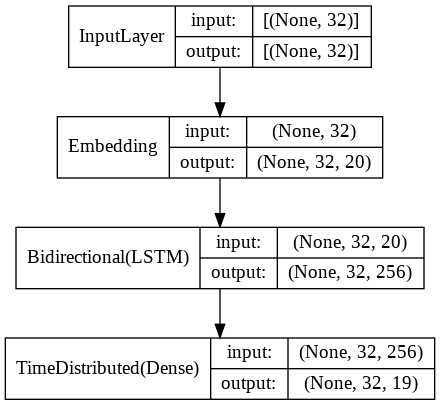

In [54]:
plot_model(model_v2, show_shapes=True, show_layer_names=False)

In [55]:
model_v2.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=128, epochs=10, verbose=1)

Epoch 1/10
1418/1418 [==============================] - 424s 295ms/step - loss: 0.5393 - precision: 0.7270 - recall: 0.2697 - accuracy: 0.0000e+00 - val_loss: 0.2781 - val_precision: 0.7962 - val_recall: 0.5831 - val_accuracy: 0.0000e+00
Epoch 2/10
1418/1418 [==============================] - 431s 304ms/step - loss: 0.2636 - precision: 0.8087 - recall: 0.5979 - accuracy: 0.0000e+00 - val_loss: 0.2461 - val_precision: 0.8130 - val_recall: 0.6184 - val_accuracy: 0.0000e+00
Epoch 3/10
1418/1418 [==============================] - 426s 301ms/step - loss: 0.2376 - precision: 0.8195 - recall: 0.6351 - accuracy: 0.0000e+00 - val_loss: 0.2398 - val_precision: 0.8111 - val_recall: 0.6315 - val_accuracy: 0.0000e+00
Epoch 4/10
1418/1418 [==============================] - 438s 309ms/step - loss: 0.2267 - precision: 0.8243 - recall: 0.6518 - accuracy: 0.0000e+00 - val_loss: 0.2359 - val_precision: 0.8159 - val_recall: 0.6374 - val_accuracy: 0.0000e+00
Epoch 5/10
1418/1418 [==========================

In [56]:
sentence_tags

[('PRCL',
  'NPRO',
  'CONJ',
  None,
  'CONJ',
  None,
  'PREP',
  'NPRO',
  'CONJ',
  'PRCL',
  'ADJF',
  'NOUN',
  'PRTF',
  'NOUN',
  None),
 (None,
  'PRCL',
  'NPRO',
  'ADVB',
  'ADJS',
  'PREP',
  None,
  'CONJ',
  'ADJF',
  'NOUN',
  'PRCL',
  'CONJ',
  None),
 ('PRCL', 'NPRO', None, 'NPRO', 'VERB', 'PREP', None),
 ('CONJ',
  'PREP',
  'NOUN',
  'VERB',
  'CONJ',
  'VERB',
  'PREP',
  None,
  'CONJ',
  'NPRO',
  'ADVB',
  None,
  'NOUN',
  None,
  'CONJ',
  'ADVB',
  'CONJ',
  'CONJ',
  'INFN',
  'PRCL',
  None),
 ('PRCL',
  'CONJ',
  'CONJ',
  'NOUN',
  'GRND',
  'PRCL',
  'NOUN',
  'NPRO',
  'VERB',
  'ADJS',
  'NOUN',
  'VERB',
  'ADVB'),
 ('PRCL', 'VERB', 'CONJ', None, 'NPRO', 'PRCL', 'VERB', 'NPRO', 'NPRO', None),
 (None,
  'PRCL',
  'PRCL',
  'CONJ',
  'PRCL',
  'CONJ',
  'PREP',
  'NPRO',
  'VERB',
  'ADVB',
  None,
  'PRCL',
  'NPRO',
  'ADJF',
  'NOUN'),
 ('PREP',
  'NPRO',
  'INFN',
  None,
  'PRED',
  'ADJF',
  'NOUN',
  'PRCL',
  'NPRO',
  'PRCL',
  'VERB'),
 ('VER

In [57]:
# один вход для слов
word_in = keras.Input(shape=(sent_max_len))
emb_word = Embedding(input_dim=len(word2id), output_dim=20, mask_zero=True)(word_in)

# другой вход для символов
char_in = keras.Input(shape=(sent_max_len, char_max_len))
emb_char = layers.TimeDistributed(Embedding(input_dim=len(char2id), output_dim=10, input_length=char_max_len))(char_in)
# свертка на символах (CharRNN) применяется к каждому слову отдельно
char_enc = layers.TimeDistributed(layers.Conv1D(filters=12, kernel_size=3))(emb_char)
char_flat = layers.TimeDistributed(Flatten())(char_enc)

# LSTM проходится по всей последовательности, на каждом шаге беря эмбеддинг слова по словарю + символьный эмбеддинг слова 
x = layers.concatenate([emb_word, char_flat])
main_lstm = layers.Bidirectional(layers.LSTM(units=128, return_sequences=True,
                               recurrent_dropout=0.2))(x)
out = layers.TimeDistributed(Dense(len(tag2id), activation="softmax"))(main_lstm)

model5 = keras.Model(inputs=[char_in, word_in], outputs=out)


optimizer = keras.optimizers.Adam(learning_rate=0.001)
model5.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=metrics)


In [58]:
model5.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 32, 39)]     0                                            
__________________________________________________________________________________________________
time_distributed_1 (TimeDistrib (None, 32, 39, 10)   950         input_3[0][0]                    
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 32)]         0                                            
__________________________________________________________________________________________________
time_distributed_2 (TimeDistrib (None, 32, 37, 12)   372         time_distributed_1[0][0]         
____________________________________________________________________________________________

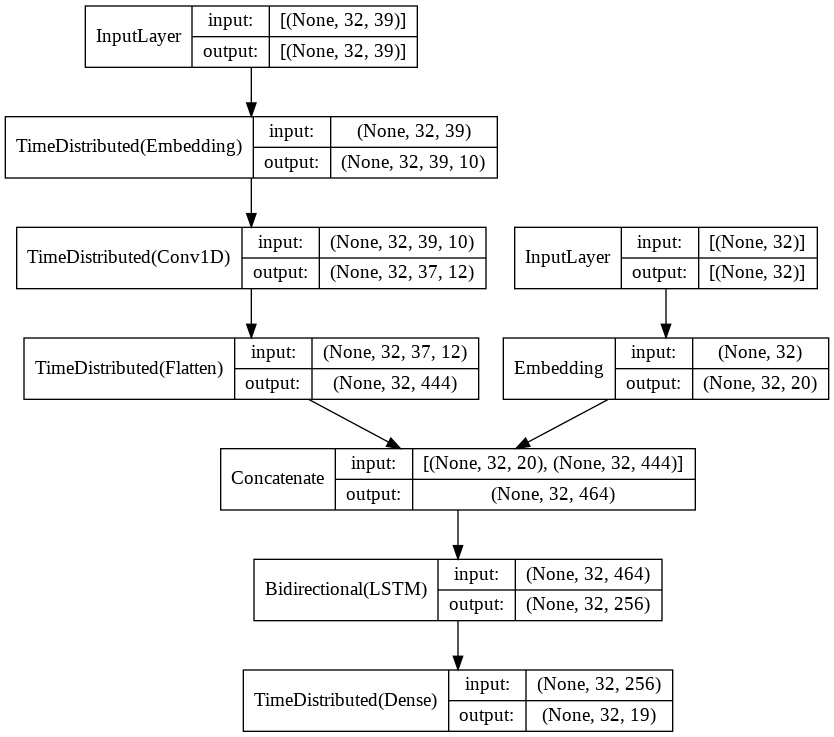

In [59]:
plot_model(model5, show_shapes=True, show_layer_names=False)

Модель с двумя входами превосходит модель с одним входом по параметру. Но несмотря на это, она проигрывает модели с fasttext в качестве проверки.

In [62]:
model5.fit([X_char_train, X_train], y_train, validation_data=([X_char_test, X_test], y_test), batch_size=128, epochs=10, verbose=1)

Epoch 1/5
1418/1418 [==============================] - 1086s 763ms/step - loss: 0.2903 - precision: 0.8387 - recall: 0.5862 - accuracy: 3.3735e-07 - val_loss: 0.1749 - val_precision: 0.8710 - val_recall: 0.7592 - val_accuracy: 2.0356e-05
Epoch 2/5
 485/1418 [=========>....................] - ETA: 11:18 - loss: 0.1707 - precision: 0.8708 - recall: 0.7606 - accuracy: 1.9857e-04

KeyboardInterrupt: ignored

In [66]:
#from tensorflow.keras.layers import Dense, Activation, Dropout, LSTM, Bidirectional, TimeDistributed, InputLayer

# один вход для слов
word_in = keras.Input(shape=(sent_max_len))
emb_word = Embedding(input_dim=len(word2id), output_dim=20, mask_zero=True)(word_in)

# другой вход для символов
char_in = keras.Input(shape=(sent_max_len, char_max_len))
emb_char = layers.TimeDistributed(Embedding(input_dim=len(char2id), output_dim=10, input_length=char_max_len))(char_in)
# свертка на символах (CharRNN) применяется к каждому слову отдельно
char_enc = layers.TimeDistributed(layers.Conv1D(filters=12, kernel_size=3))(emb_char)
char_flat = layers.TimeDistributed(Flatten())(char_enc)

# LSTM проходится по всей последовательности, на каждом шаге беря эмбеддинг слова по словарю + символьный эмбеддинг слова 
x = layers.concatenate([emb_word, char_flat])
main_lstm = layers.Bidirectional(layers.LSTM(units=128, return_sequences=True,
                               recurrent_dropout=0.4))(x)
out = layers.TimeDistributed(Dense(len(tag2id), activation="sigmoid"))(main_lstm)

model5 = keras.Model(inputs=[char_in, word_in], outputs=out)


optimizer = keras.optimizers.Adam(learning_rate=0.001)
model5.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=metrics)


In [67]:
model5.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            [(None, 32, 39)]     0                                            
__________________________________________________________________________________________________
time_distributed_9 (TimeDistrib (None, 32, 39, 10)   950         input_7[0][0]                    
__________________________________________________________________________________________________
input_6 (InputLayer)            [(None, 32)]         0                                            
__________________________________________________________________________________________________
time_distributed_10 (TimeDistri (None, 32, 37, 12)   372         time_distributed_9[0][0]         
____________________________________________________________________________________________

In [69]:
model5.fit([X_char_train, X_train], y_train, validation_data=([X_char_test, X_test], y_test), batch_size=128, epochs=5, verbose=1)

Epoch 1/5
1418/1418 [==============================] - 1084s 760ms/step - loss: 0.4711 - precision: 0.4928 - recall: 0.4734 - accuracy: 9.3138e-05 - val_loss: 0.1836 - val_precision: 0.9944 - val_recall: 0.1889 - val_accuracy: 0.0000e+00
Epoch 2/5
1418/1418 [==============================] - 1076s 759ms/step - loss: 0.1775 - precision: 0.9930 - recall: 0.1927 - accuracy: 0.0000e+00 - val_loss: 0.1574 - val_precision: 0.9943 - val_recall: 0.2100 - val_accuracy: 0.0000e+00
Epoch 3/5
  57/1418 [>.............................] - ETA: 16:13 - loss: 0.1628 - precision: 0.9943 - recall: 0.2125 - accuracy: 0.0000e+00

KeyboardInterrupt: ignored

Итоговая модель получилась лучше предыдущей ввиду более высокого значения recurrent_dropout (0.4 vs 0.2).